# Homework 3

## 1) Preprocess Dataset

In [3]:
# import needed libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, make_scorer
import seaborn as sns

In [4]:
# load dataset
df = pd.read_csv("rent.csv")

In [5]:
# check for missing values
df.isnull().sum()

bathrooms         0
bedrooms          0
price             0
longitude         0
latitude          0
interest_level    0
dtype: int64

In [6]:
df

,bathrooms,bedrooms,price,longitude,latitude,interest_level
0,1.5,3,3000,-73.9425,40.7145,2
1,1.0,2,5465,-73.9667,40.7947,1
2,1.0,1,2850,-74.0018,40.7388,3
3,1.0,1,3275,-73.9677,40.7539,1
4,1.0,4,3350,-73.9493,40.8241,1
...,...,...,...,...,...,...
49347,1.0,2,3200,-73.9790,40.7426,2
49348,1.0,1,3950,-74.0163,40.7102,1
49349,1.0,1,2595,-73.9900,40.7601,1
49350,1.0,0,3350,-74.0101,40.7066,1


In [7]:
df.describe()

,bathrooms,bedrooms,price,longitude,latitude,interest_level
count,49352.00000,49352.000000,4.935200e+04,49352.000000,49352.000000,49352.000000
mean,1.21218,1.541640,3.830174e+03,-73.955716,40.741545,1.383105
std,0.50142,1.115018,2.206687e+04,1.177912,0.638535,0.626035
min,0.00000,0.000000,4.300000e+01,-118.271000,0.000000,1.000000
25%,1.00000,1.000000,2.500000e+03,-73.991700,40.728300,1.000000
50%,1.00000,1.000000,3.150000e+03,-73.977900,40.751800,1.000000
75%,1.00000,2.000000,4.100000e+03,-73.954800,40.774300,2.000000
max,10.00000,8.000000,4.490000e+06,0.000000,44.883500,3.000000


## 2) Data Exploration

In [8]:
# separate input from output variables
X = df.drop(columns=['price'])
y = df['price']

df

,bathrooms,bedrooms,price,longitude,latitude,interest_level
0,1.5,3,3000,-73.9425,40.7145,2
1,1.0,2,5465,-73.9667,40.7947,1
2,1.0,1,2850,-74.0018,40.7388,3
3,1.0,1,3275,-73.9677,40.7539,1
4,1.0,4,3350,-73.9493,40.8241,1
...,...,...,...,...,...,...
49347,1.0,2,3200,-73.9790,40.7426,2
49348,1.0,1,3950,-74.0163,40.7102,1
49349,1.0,1,2595,-73.9900,40.7601,1
49350,1.0,0,3350,-74.0101,40.7066,1


## 3) Question 5

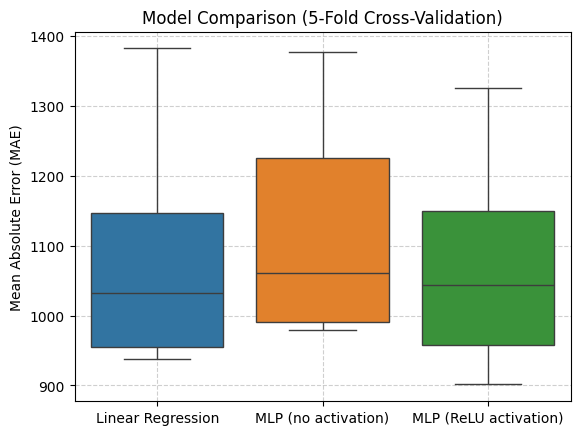

In [9]:
# use 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# define models
models = {
    "Linear Regression": LinearRegression(),
    "MLP (no activation)": MLPRegressor(
        hidden_layer_sizes=(5, 5),
        activation='identity',
        max_iter=5000,
        random_state=42
    ),
    "MLP (ReLU activation)": MLPRegressor(
        hidden_layer_sizes=(5, 5),
        activation='relu',
        max_iter=5000,
        random_state=42
    )
}

# evaluate models
results = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring="neg_mean_absolute_error")
    # convert negative MAE values to positive
    results[name] = -scores

final_results = pd.DataFrame(results)
sns.boxplot(data=final_results)
plt.ylabel("Mean Absolute Error (MAE)")
plt.title("Model Comparison (5-Fold Cross-Validation)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


## 4) Question 6

## 5) Question 7